In [1]:
import pandas as pd
import glob
import numpy as np
import pylab as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [3]:
FNAMES = glob.glob('../results/random_100-10_100/*7.rnnres')
FLEXROC = '/home/yhuang10/Spatio-Temporal/cynet_/bin/flexroc '
CF = pd.read_csv('../../data/cynet_performance.csv')
CF = CF.round(4)

In [4]:
RES = []
for fname in FNAMES:
    df = pd.read_csv(fname)
    h = np.array(fname.split('/')[-1].split('_')[0].split('#')).astype(float)
    
    print('{}: '.format(h), end='')

    df[['AR_grt','AR_prd']].to_csv('tmp.csv', header=None, index=None, sep=' ')

    result = ! $FLEXROC -i tmp.csv -w 1 -x 0 -t 0.8 -f 0.2 -E 0 -C 1 -L 1
    auc_ar = float(result[0].split()[1])
    print('{:.4f}, '.format(auc_ar), end='')
    
    df[['AS_grt','AS_prd']].to_csv('tmp.csv', header=None, index=None, sep=' ')
    result = ! $FLEXROC -i tmp.csv -w 1 -x 0 -t 0.8 -f 0.2 -E 0 -C 1 -L 1
    auc_as = float(result[0].split()[1])
    print('{:.4f}, '.format(auc_as), end='')
    
    df[['PR_grt','PR_prd']].to_csv('tmp.csv',header=None,index=None,sep=' ')
    result = ! $FLEXROC -i tmp.csv -w 1 -x 0 -t 0.8 -f 0.2 -E 0 -C 1 -L 1
    auc_pr = float(result[0].split()[1])
    print('{:.4f}, '.format(auc_pr))

    res = np.append(h, [auc_ar, auc_as, auc_pr])
    RES.append(res)
    
! rm tmp.csv
RES = np.array(RES)

[ 41.90628  41.90905 -87.67839 -87.67487]: 0.7974, 0.8136, 0.7647, 
[ 41.90352  41.90628 -87.71357 -87.71005]: 0.7502, 0.7585, 0.7216, 
[ 41.89246  41.89523 -87.6608  -87.65729]: 0.7496, 0.6229, 0.7139, 
[ 41.7598   41.76256 -87.64322 -87.6397 ]: 0.7454, 0.7239, 0.7975, 
[ 41.75704  41.7598  -87.59045 -87.58693]: 0.7175, 0.8327, 0.7477, 
[ 41.73216  41.73492 -87.55528 -87.55176]: 0.6985, 0.7571, 0.6999, 
[ 41.76256  41.76533 -87.67487 -87.67136]: 0.7980, 0.7574, 0.7910, 
[ 41.87588  41.87864 -87.6995  -87.69598]: 0.7131, 0.8419, 0.7695, 
[ 41.74874  41.75151 -87.61156 -87.60804]: 0.8112, 0.7686, 0.8291, 
[ 41.87312  41.87588 -87.76281 -87.7593 ]: 0.8067, 0.7952, 0.6852, 
[ 41.99472  41.99749 -87.69246 -87.68894]: 0.7861, 0.7806, 0.7740, 
[ 41.88417  41.88693 -87.72764 -87.72412]: 0.7739, 0.6705, 0.6697, 
[ 41.74322  41.74598 -87.59749 -87.59397]: 0.7356, 0.8039, 0.7370, 
[ 41.77362  41.77638 -87.61859 -87.61508]: 0.7790, 0.7409, 0.7494, 
[ 41.88141  41.88417 -87.63266 -87.62915]: 0.839

In [5]:
rf = pd.DataFrame(RES, columns=['lat1','lat2','lon1','lon2',
                                'VAR', 
                                'HOMICIDE-ASSAULT-BATTERY',
                                'BURGLARY-THEFT-MOTOR_VEHICLE_THEFT'
                               ])
rf=rf.set_index(['lat1','lat2','lon1','lon2']).stack().reset_index().rename(columns={'level_4':'var',0:'auc_NN'})
rf=rf.round(4)

In [6]:
mf = CF.set_index(['lat1','lat2','lon1','lon2','var'])\
            .join(rf.set_index(['lat1','lat2','lon1','lon2','var'])).reset_index().dropna()

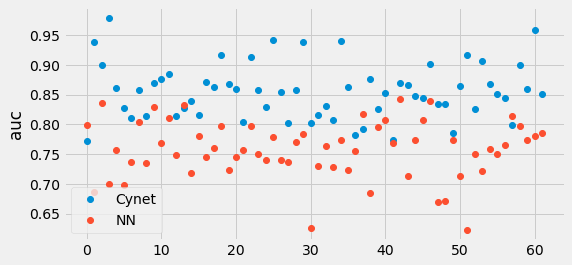

In [7]:
plt.figure(figsize=(8, 4))
ax = mf.reset_index(drop=True).auc.plot(style='o', label='Cynet')
mf.reset_index(drop=True).auc_NN.plot(ax=ax, style='o',label='NN')
plt.gca().set_ylabel('auc')
plt.gca().legend()
# plt.gca().set_xlim(-1,34)
plt.savefig('aucrnn21.png', dpi=200, bbox_inches='tight')
plt.show()

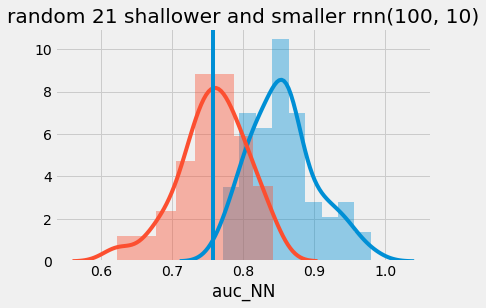

In [9]:
sns.distplot(mf.auc)
ax = sns.distplot(mf.auc_NN)
ax.axvline(mf.auc_NN.mean())
ax.set_title('random 21 shallower and smaller rnn(100, 10)')
plt.savefig('../random21_rnn-100-10.png', dpi=200, bbox_inches='tight')
plt.show()